In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calc_ew_alpha(**args):
    if 'com' in args:
        alpha = 1 / (1 + args['com'])
    elif 'span' in args:
        alpha = 2 / (args['span'] + 1.0)
    elif 'halflife' in args:
        alpha = 1 - np.exp(np.log(0.5) / args['halflife'])
    return alpha

In [3]:
np.random.seed(100)
ss = pd.Series(np.random.random(20))

# Explore Special Situation

## When $\alpha \rightarrow 0$

#### Mean

In [4]:
alpha = 1e-6
ss_m = ss.mean()
ss_ewm = ss.ewm(alpha=alpha).mean()
ss_epm = ss.expanding().mean()

In [5]:
print(abs(ss_m - ss_ewm.iloc[-1]))
print(abs(ss_m - ss_epm.iloc[-1]))
print(abs(ss_ewm.iloc[-1] - ss_epm.iloc[-1]))

1.1994994808528503e-07
1.1102230246251565e-16
1.1994994797426273e-07


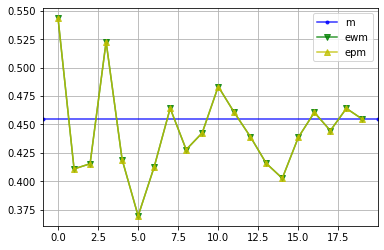

In [6]:
plt.axhline(ss_m, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewm, marker='v', alpha=0.8, color='g')
plt.plot(ss_epm, marker='^', alpha=0.8, color='y')
plt.grid(True)
plt.legend(['m', 'ewm', 'epm'])

#### Standard Deviation

In [7]:
alpha = 1e-6
ss_std = ss.std()
ss_ewsd = ss.ewm(alpha=alpha).std()
ss_epsd = ss.expanding().std()

In [8]:
print(abs(ss_std - ss_ewsd.iloc[-1]))
print(abs(ss_std - ss_epsd.iloc[-1]))
print(abs(ss_ewsd.iloc[-1] - ss_epsd.iloc[-1]))

1.462252693928967e-07
5.551115123125783e-17
1.4622526933738555e-07


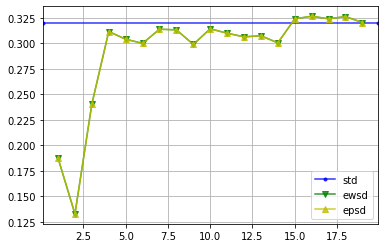

In [9]:
plt.axhline(ss_std, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewsd, marker='v', alpha=0.8, color='g')
plt.plot(ss_epsd, marker='^', alpha=0.8, color='y')
plt.grid(True)
plt.legend(['std', 'ewsd', 'epsd'])

### When $\alpha \rightarrow 1$

#### Mean

In [10]:
alpha = 1 - 1e-6
ss_m = ss.mean()
ss_ewm = ss.ewm(alpha=alpha).mean()
ss_epm = ss.expanding().mean()

In [11]:
print(abs(ss_m - ss_ewm.iloc[-1]))
print(abs(ss_m - ss_epm.iloc[-1]))
print(abs(ss_ewm.iloc[-1] - ss_epm.iloc[-1]))

0.18053725616981925
1.1102230246251565e-16
0.18053725616981936


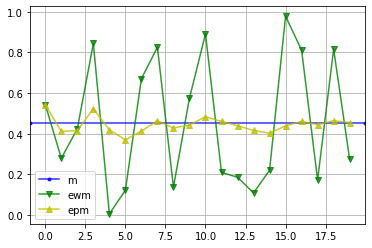

In [12]:
plt.axhline(ss_m, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewm, marker='v', alpha=0.8, color='g')
plt.plot(ss_epm, marker='^', alpha=0.8, color='y')
plt.grid(True)
plt.legend(['m', 'ewm', 'epm'])

#### Standard Deviation

In [13]:
alpha = 1 - 1e-6
ss_std = ss.std()
ss_ewsd = ss.ewm(alpha=alpha).std()
ss_epsd = ss.expanding().std()

In [14]:
print(abs(ss_std - ss_ewsd.iloc[-1]))
print(abs(ss_std - ss_epsd.iloc[-1]))
print(abs(ss_ewsd.iloc[-1] - ss_epsd.iloc[-1]))

0.06304750446343121
5.551115123125783e-17
0.06304750446343116


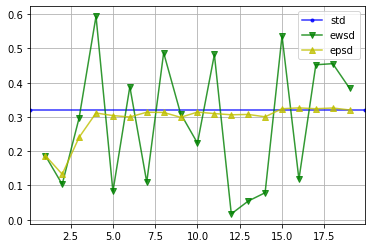

In [15]:
plt.axhline(ss_std, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewsd, marker='v', alpha=0.8, color='g')
plt.plot(ss_epsd, marker='^', alpha=0.8, color='y')
plt.grid(True)
plt.legend(['std', 'ewsd', 'epsd'])

### When $\alpha \rightarrow 0.5$

#### Mean

In [16]:
alpha = 0.5
ss_m = ss.mean()
ss_ewm = ss.ewm(alpha=alpha).mean()
ss_epm = ss.expanding().mean()

In [17]:
print(abs(ss_m - ss_ewm.iloc[-1]))
print(abs(ss_m - ss_epm.iloc[-1]))
print(abs(ss_ewm.iloc[-1] - ss_epm.iloc[-1]))

0.003961972561913829
1.1102230246251565e-16
0.00396197256191394


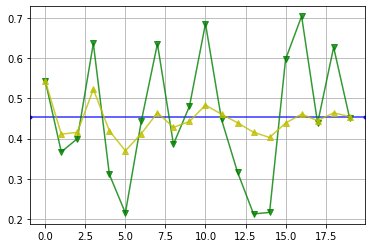

In [18]:
plt.axhline(ss_m, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewm, marker='v', alpha=0.8, color='g')
plt.plot(ss_epm, marker='^', alpha=0.8, color='y')
plt.grid(True)

#### Standard Deviation

In [19]:
alpha = 1 - 1e-6
ss_std = ss.std()
ss_ewsd = ss.ewm(alpha=alpha).std()
ss_epsd = ss.expanding().std()

In [20]:
print(abs(ss_std - ss_ewsd.iloc[-1]))
print(abs(ss_std - ss_epsd.iloc[-1]))
print(abs(ss_ewsd.iloc[-1] - ss_epsd.iloc[-1]))

0.06304750446343121
5.551115123125783e-17
0.06304750446343116


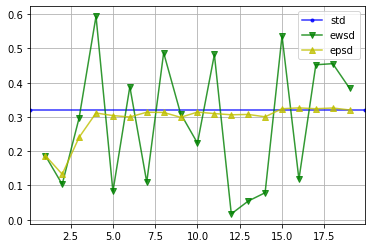

In [21]:
plt.axhline(ss_std, marker='.', alpha=0.8, color='b')
plt.plot(ss_ewsd, marker='v', alpha=0.8, color='g')
plt.plot(ss_epsd, marker='^', alpha=0.8, color='y')
plt.grid(True)
plt.legend(['std', 'ewsd', 'epsd'])

### Result1

- 当alpha接近0（alpha不能等于0）时，ewm的方法与expanding方法结果几乎一致。
- 没有参数使得rolling复现ewm的映射。

# Monte Carlos Searching

In [22]:
from tqdm.notebook import tqdm, trange

def mean_err(ss, alpha, window):
    ss_ewm = ss.ewm(alpha=alpha).mean()
    ss_rolm = ss.rolling(window).mean()
    return np.mean(np.abs(ss_ewm - ss_rolm))

### Attempt 1

### Attempt 2


[3500, 3500, 3500, 3300, 3500, nan]


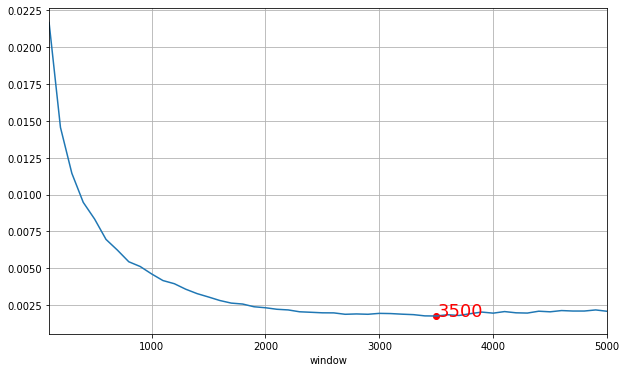

In [23]:
a = 0.0005
num_xs = 10000
max_window = 5000
window_step = 100
num_epoch = 100

rs = pd.DataFrame([(i + 1, w, mean_err(pd.Series(np.random.random(num_xs)), a, w)) for i in trange(num_epoch) for w in range(window_step, max_window + 1, window_step)], columns=['batch', 'window', 'merr'])
df = rs.pivot('window', 'batch', 'merr')
mean_df_merr = df.mean(axis=1)
best_window0 = mean_df_merr.idxmin()
best_window1 = mean_df_merr.rolling(3, center=True).mean().idxmin()    # incre = 2 * (w_{t} - w_{t-1})
best_window2 = mean_df_merr.rolling(7, center=True).mean().idxmin()
best_window3 = mean_df_merr.rolling(15, center=True).mean().idxmin()
best_window4 = mean_df_merr.rolling(31, center=True).mean().idxmin()
best_window5 = mean_df_merr.rolling(63, center=True).mean().idxmin()
mean_df_merr.plot.line(figsize=(10, 6), grid=True)
plt.scatter(best_window0, mean_df_merr.loc[best_window0], color='r')
_ = plt.text(best_window0 + 10, mean_df_merr.loc[best_window0], best_window0, fontdict={'size':18, 'color':'r'})
print([best_window0, best_window1, best_window2, best_window3, best_window4, best_window5])


[100, 200, 400, 800, 1600, nan]


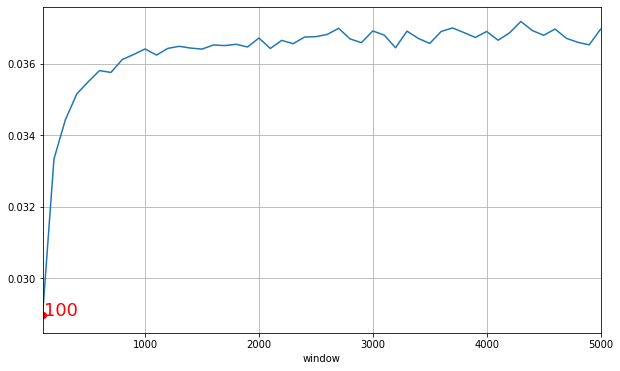

In [24]:
a = 0.05
num_xs = 10000
max_window = 5000
window_step = 100
num_epoch = 100

rs = pd.DataFrame([(i + 1, w, mean_err(pd.Series(np.random.random(num_xs)), a, w)) for i in trange(num_epoch) for w in range(window_step, max_window + 1, window_step)], columns=['batch', 'window', 'merr'])
df = rs.pivot('window', 'batch', 'merr')
mean_df_merr = df.mean(axis=1)
best_window0 = mean_df_merr.idxmin()
best_window1 = mean_df_merr.rolling(3, center=True).mean().idxmin()    # incre = 2 * (w_{t} - w_{t-1})
best_window2 = mean_df_merr.rolling(7, center=True).mean().idxmin()
best_window3 = mean_df_merr.rolling(15, center=True).mean().idxmin()
best_window4 = mean_df_merr.rolling(31, center=True).mean().idxmin()
best_window5 = mean_df_merr.rolling(63, center=True).mean().idxmin()
mean_df_merr.plot.line(figsize=(10, 6), grid=True)
plt.scatter(best_window0, mean_df_merr.loc[best_window0], color='r')
_ = plt.text(best_window0 + 10, mean_df_merr.loc[best_window0], best_window0, fontdict={'size':18, 'color':'r'})
print([best_window0, best_window1, best_window2, best_window3, best_window4, best_window5])


[100, 200, 400, 800, 1600, nan]


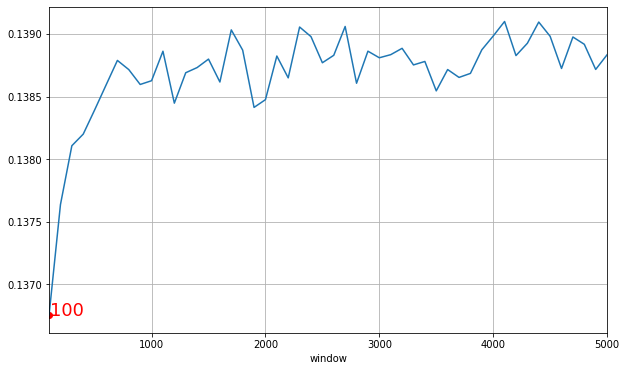

In [25]:
a = 0.5
num_xs = 10000
max_window = 5000
window_step = 100
num_epoch = 100

rs = pd.DataFrame([(i + 1, w, mean_err(pd.Series(np.random.random(num_xs)), a, w)) for i in trange(num_epoch) for w in range(window_step, max_window + 1, window_step)], columns=['batch', 'window', 'merr'])
df = rs.pivot('window', 'batch', 'merr')
mean_df_merr = df.mean(axis=1)
best_window0 = mean_df_merr.idxmin()
best_window1 = mean_df_merr.rolling(3, center=True).mean().idxmin()    # incre = 2 * (w_{t} - w_{t-1})
best_window2 = mean_df_merr.rolling(7, center=True).mean().idxmin()
best_window3 = mean_df_merr.rolling(15, center=True).mean().idxmin()
best_window4 = mean_df_merr.rolling(31, center=True).mean().idxmin()
best_window5 = mean_df_merr.rolling(63, center=True).mean().idxmin()
mean_df_merr.plot.line(figsize=(10, 6), grid=True)
plt.scatter(best_window0, mean_df_merr.loc[best_window0], color='r')
_ = plt.text(best_window0 + 10, mean_df_merr.loc[best_window0], best_window0, fontdict={'size':18, 'color':'r'})
print([best_window0, best_window1, best_window2, best_window3, best_window4, best_window5])

### Attempt 3

In [36]:
def get_best_window(alpha, num_xs, max_window, window_step, num_epoch=100):
    """
    Example:
        alpha=0.1
        windows = np.arange(1, 101)
        num_batch = 10
        best_windows = get_best_window(alpha, num_xs, num_epoch)
    """


    rs = pd.DataFrame([(i + 1, w, mean_err(pd.Series(np.random.random(num_xs)), a, w)) for i in range(num_epoch) for w in range(window_step, max_window + 1, window_step)], columns=['batch', 'window', 'merr'])
    df = rs.pivot('window', 'batch', 'merr')
    mean_df_merr = df.mean(axis=1)
    best_window0 = mean_df_merr.idxmin()
    best_window1 = mean_df_merr.rolling(3, center=True).mean().idxmin()    # incre = 2 * (w_{t} - w_{t-1})
    best_window2 = mean_df_merr.rolling(7, center=True).mean().idxmin()
    best_window3 = mean_df_merr.rolling(15, center=True).mean().idxmin()
    best_window4 = mean_df_merr.rolling(31, center=True).mean().idxmin()
    best_window5 = mean_df_merr.rolling(63, center=True).mean().idxmin()
    return [best_window0, best_window1, best_window2, best_window3, best_window4, best_window5]

In [43]:
alphas = np.linspace(0.01, 0.95, 200)
num_xs = 5000
max_window = 1000
window_step = 2
num_epoch = 100

In [66]:
rs_list = []
for alpha in tqdm(alphas):
    best_windows = get_best_window(alpha, num_xs=num_xs, max_window=max_window, window_step=window_step, num_epoch=num_epoch)
    rs_list.append([alpha] + best_windows)

In [64]:
rs_list = []
for a, d in zip(alphas, rs_list):
    rs_list.append({a: list(d.values())[0]})

In [119]:
rs = pd.DataFrame(rs_list, columns=['alpha', 'bw0', 'bw1', 'bw2', 'bw3', 'bw4', 'bw5'])

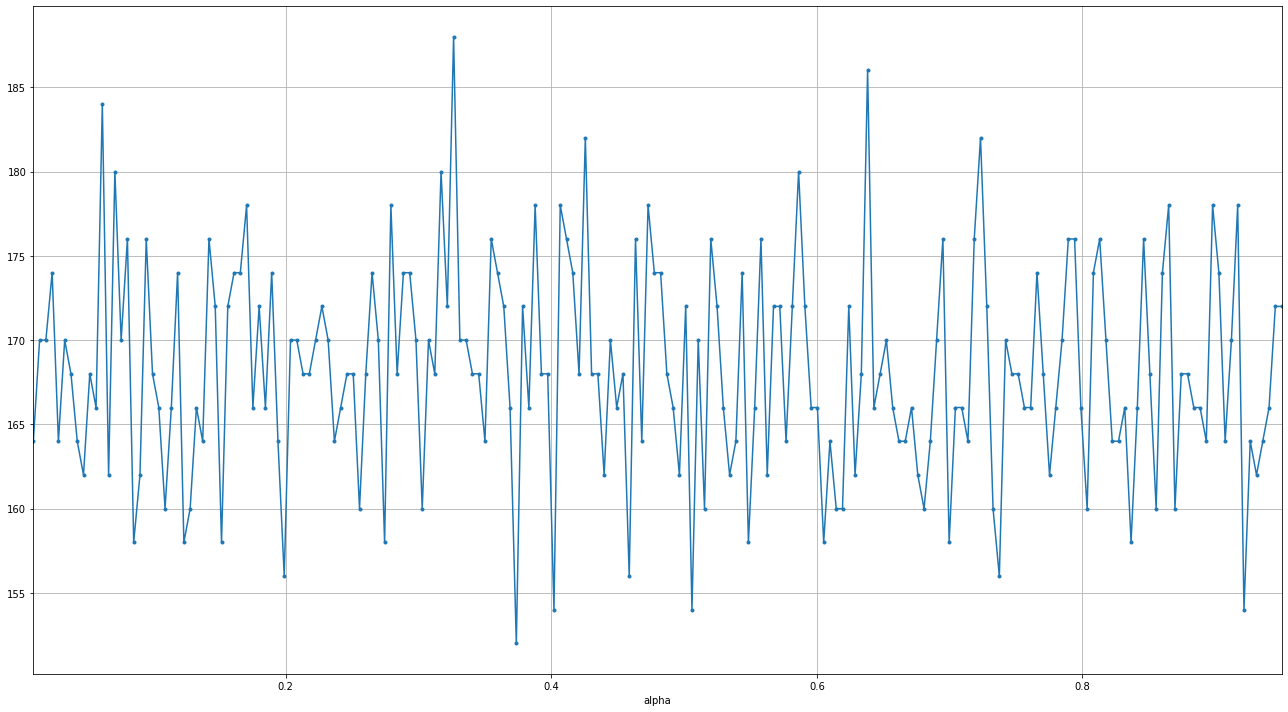

In [126]:
_ = rs.set_index('alpha')['bw0'].plot.line(figsize=(18, 10), grid=True, marker='.')
plt.tight_layout()

### Result 2

- 不同的衰减程度，似乎对应着同一个滚动窗口
- 总结：没有发现alpha和window有一定映射规律
- 进一步研究方向
    - 观察下MC的参数更精细的情况
    - alpha越小对应的周期越长，而且反比关系不是线性的
        - 对alpha值域分区研究。比如
            - alpha为[0.5, 0.9999)时，对应滚动窗口(1, 10)
            - alpha为[0.0001, 0.0002)时，对应滚动窗口(5000, 50000)